# Delhi Weather Data

Delhi Weather data 1997 to 2016 December 

# Attribute information

0. datetime_utc
1. _conds
2. _dewptm
3. dewpoint in C
4. _fog
5. _hail
6. _heatindexm
7. _hum
8. humidity   
9. _precipm
10. _pressurem
11. _rain
12. _snow
13. _tempm
14. _thunder
15. _tornado
16. _vism
17. _wdird
18. _wdire
19. _wgustm
20. _windchillm
21. _wspdm


Importing libraries that are required for visualisation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import datetime
from pylab import rcParams
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Reading the Data

In [2]:
data=pd.read_csv("testset.csv")

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [4]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [5]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


Our data has an attribute datetime_utc. We are now wxtracting date, year, onth,day and hour

In [6]:
data['Date'] = pd.to_datetime(data['datetime_utc'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

In [7]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_wdird,_wdire,_wgustm,_windchillm,_wspdm,Date,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00,1996,11,1,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00,1996,11,1,12
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00,1996,11,1,13
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00,1996,11,1,14
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00,1996,11,1,16


In [8]:
data['year'].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [9]:
import scipy.stats

Text(0.5, 0, 'year')

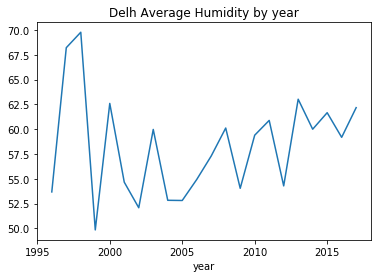

In [10]:
year_data = data.groupby(data.year).mean()
plt.plot(year_data[' _hum'])
plt.title('Delh Average Humidity by year')
plt.xlabel('year')

Average humidity in delhi by year. We can see that the humidity is varying continuously over the years and is on the rise from 2015

Text(0.5, 0, 'year')

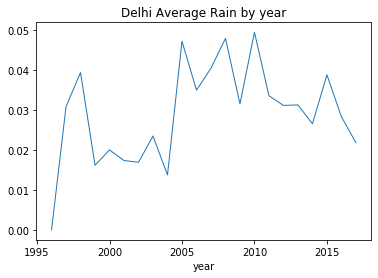

In [11]:
year_rain = data.groupby(data.year).mean()
year_rain[' _rain'].plot(linewidth=1)
plt.title('Delhi Average Rain by year')
plt.xlabel('year')

[[Text(0, 0, '1996'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '2016'),
  Text(0, 0, '')]]

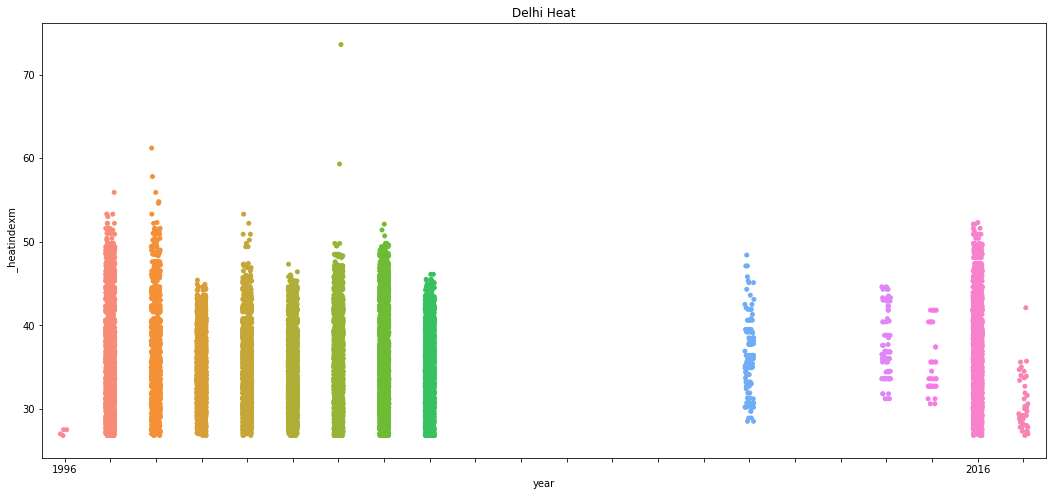

In [12]:
plt.figure(figsize=(18,8))
p = sns.stripplot(data=data, x='year', y=' _heatindexm');
p.set(title='Delhi Heat')
dec_ticks = [y if not x%20 else '' for x,y in enumerate(p.get_xticklabels())]
p.set(xticklabels=dec_ticks)

Strip plot between heatindex and year

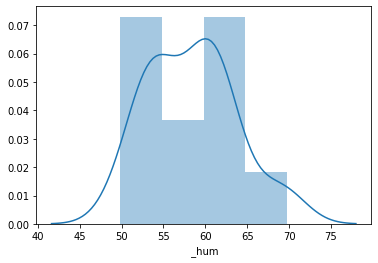

In [13]:
sns.distplot(year_data[' _hum'])

Distance plot of humidity

In [14]:
year_data.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,...,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,day,hour
year,,,,,,,,,,,,,,,,,,,,,
1996,5.992851,0.064945,0.000000,27.200000,53.676728,NaN,653.453052,0.000000,0.0,16.518636,...,0.000000,2.198981,106.666667,NaN,4.957143,5.052735,1996.0,11.521909,15.970266,11.747261
1997,17.052394,0.085828,0.000000,36.610203,68.217885,NaN,731.160755,0.030861,0.0,24.444635,...,0.000000,3.019983,138.686320,36.697647,5.730000,9.351890,1997.0,6.061569,15.716567,11.405497
1998,17.711256,0.095557,0.000000,36.446695,69.775042,NaN,804.928360,0.039396,0.0,24.847371,...,0.000000,2.461202,127.001397,40.994444,5.484211,7.112116,1998.0,6.662196,15.561609,11.075161
1999,14.609585,0.060159,0.000000,34.400058,49.845674,NaN,16987.102000,0.016190,0.0,27.335731,...,0.000159,2.836702,138.841429,37.489815,6.240000,7.717482,1999.0,7.504444,15.910159,11.334286
2000,15.346326,0.076980,0.000185,34.823648,62.598992,NaN,934.518086,0.020033,0.0,23.865647,...,0.000000,2.498489,143.721017,37.132787,6.326531,8.046553,2000.0,7.589687,15.309405,11.429048


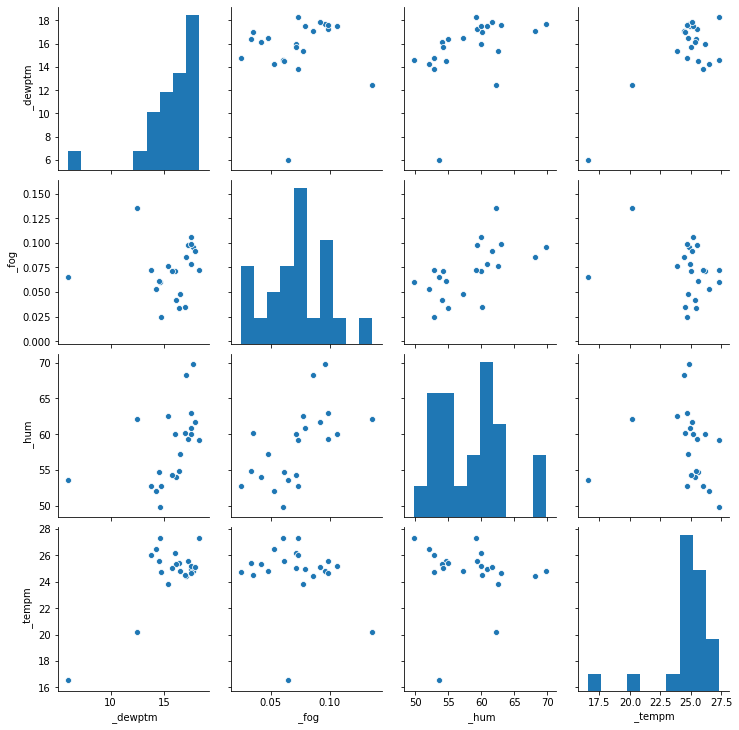

In [15]:
year_data1=pd.DataFrame(year_data.iloc[:,[0,1,4,9]])
sns.pairplot(year_data1)

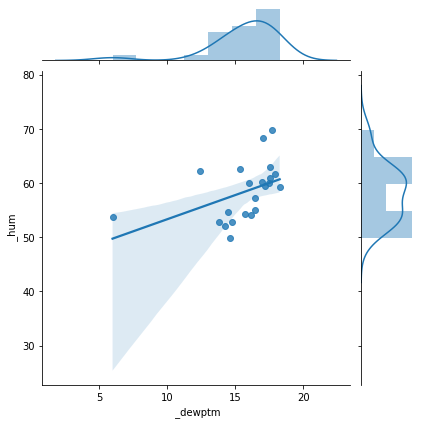

In [16]:
sns.jointplot(x=' _dewptm',y=' _hum',data=year_data1,kind='reg')

In [17]:
year_data.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,...,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,day,hour
year,,,,,,,,,,,,,,,,,,,,,
1996,5.992851,0.064945,0.000000,27.200000,53.676728,NaN,653.453052,0.000000,0.0,16.518636,...,0.000000,2.198981,106.666667,NaN,4.957143,5.052735,1996.0,11.521909,15.970266,11.747261
1997,17.052394,0.085828,0.000000,36.610203,68.217885,NaN,731.160755,0.030861,0.0,24.444635,...,0.000000,3.019983,138.686320,36.697647,5.730000,9.351890,1997.0,6.061569,15.716567,11.405497
1998,17.711256,0.095557,0.000000,36.446695,69.775042,NaN,804.928360,0.039396,0.0,24.847371,...,0.000000,2.461202,127.001397,40.994444,5.484211,7.112116,1998.0,6.662196,15.561609,11.075161
1999,14.609585,0.060159,0.000000,34.400058,49.845674,NaN,16987.102000,0.016190,0.0,27.335731,...,0.000159,2.836702,138.841429,37.489815,6.240000,7.717482,1999.0,7.504444,15.910159,11.334286
2000,15.346326,0.076980,0.000185,34.823648,62.598992,NaN,934.518086,0.020033,0.0,23.865647,...,0.000000,2.498489,143.721017,37.132787,6.326531,8.046553,2000.0,7.589687,15.309405,11.429048


In [18]:
'''
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, 
Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, 
Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r,
RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r,
Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, 
coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, 
gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, 
inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma,
plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10,
tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, 
twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
'''


'\nAccent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, \nGreens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, \nPastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r,\nRdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r,\nSpectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, \nautumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, \ncoolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, \ngist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, \ngist_yarg_r, g

In [19]:
data1= data[[' _rain',' _fog']]

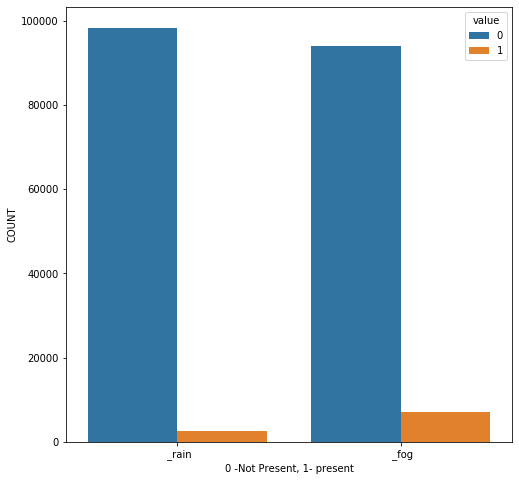

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x="variable", hue="value", data=pd.melt(data1))
plt.xlabel("0 -Not Present, 1- present");
plt.ylabel("COUNT");

Count plot of Rain and fog which shows whether rain is present or not. We can see that maximum count in both rain and fog is not present wheras only small amount is of rain present

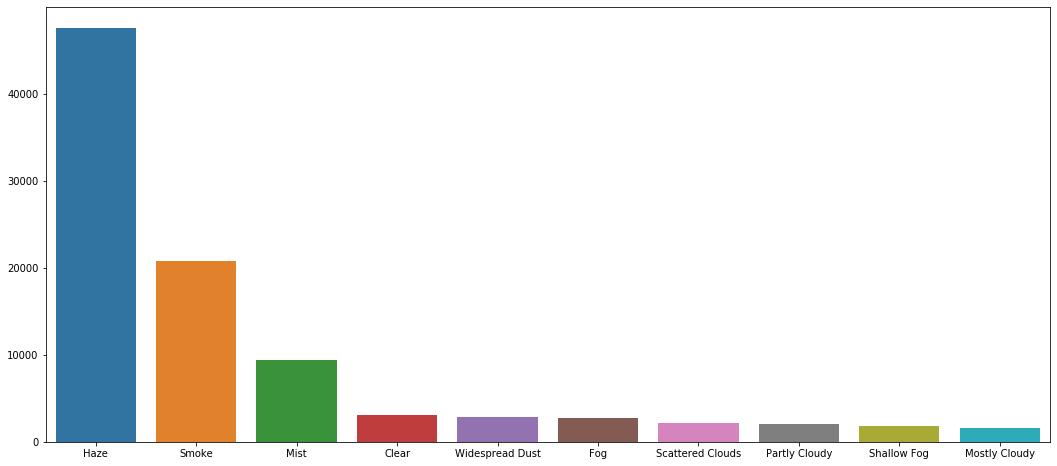

In [21]:
plt.figure(figsize=(18,8))
ax = data[' _conds'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=ax.index, y=ax.values)

This bar plot shows top 10 conditions in delhi over 20 years. Haze is most common condition in the national capital

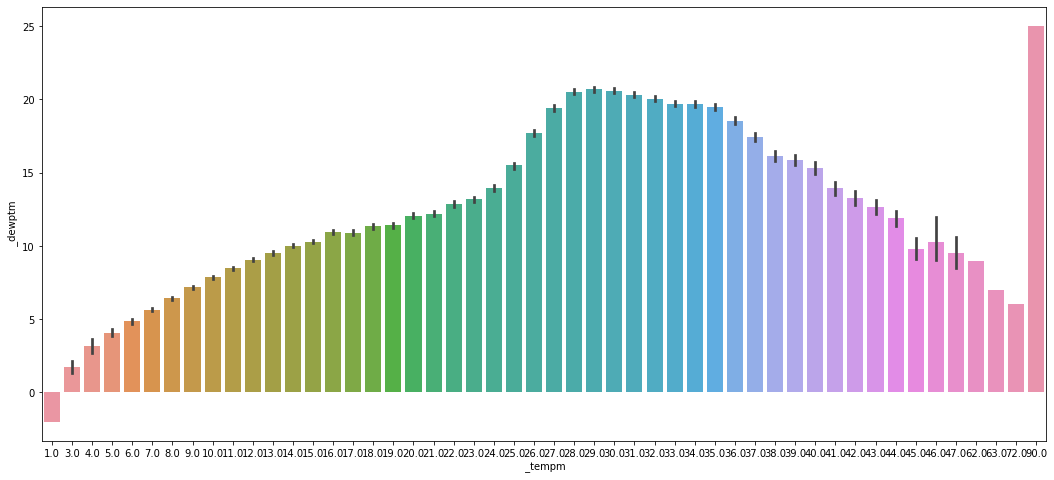

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(data[' _tempm'],data[' _dewptm'])

# Machine Learning Models

In [23]:
from sklearn import metrics
dataset=pd.read_csv('testset.csv')

Heatmap showing null values in the data. We can see that 4 attributes contain only null or most of null values. So it is preferable to delete them from our dataset

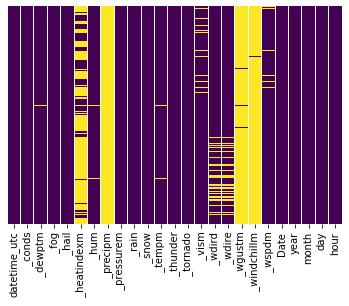

In [24]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
dataset=dataset.drop(columns=[' _heatindexm',' _precipm',' _wgustm', ' _windchillm'])

dropping useless data

In [26]:
corr1=dataset.corr()

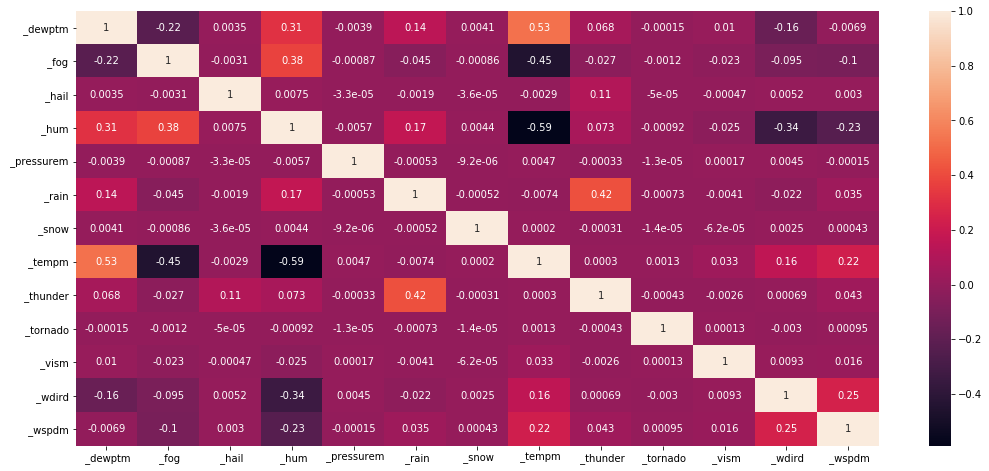

In [27]:
plt.figure(figsize=(18,8))
sns.heatmap(corr1,annot=True)

Heatmap showing correlation between atributes in our dataset. We can see that maximum correlation is between temperature and dew and that too 0.53. So our data is not highly correlated and thus highly difficuilt to work upon

# Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

In [28]:
dataset.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


Storing the data in our variables, filling the null values, encoding our data, Training and testing our data and calculating rmse and r-square 

In [31]:
x=pd.DataFrame(dataset.iloc[:,[1,2,5]])
y=pd.DataFrame(dataset.iloc[:,9])



from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(x.iloc[:,[1,2]])
x.iloc[:,[1,2]] = imputer.transform(x.iloc[:,[1,2]])



imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(y.iloc[:,])
y.iloc[:,] = imputer.transform(y.iloc[:,])



x.iloc[:,0]= x.iloc[:,0].str.replace(' ', '')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x.iloc[:,0] = le.fit_transform(x.iloc[:,0].astype(str))

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_x=LabelEncoder()
x.iloc[:,0]=labelEncoder_x.fit_transform(x.iloc[:,0])



oneHotEncoder=OneHotEncoder(categorical_features=[0])
x=oneHotEncoder.fit_transform(x).toarray()

labelEncoder_y=LabelEncoder()
y=labelEncoder_y.fit_transform(y)

from sklearn.model_selection import train_test_split # x ke correspoding y aayega test mein. x jaise random le liye fir y uske corresponding hi aayega
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)


print('coefficent\n' , regressor.coef_)

print('intercept' , regressor.intercept_)



y_pred = regressor.predict(x_test)
from sklearn.metrics import mean_squared_error , r2_score
print("mean squared error::: {}".format(mean_squared_error(y_test,y_pred)))
print("r2 score: {}".format(r2_score(y_test,y_pred)))
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vecto

coefficent
 [-2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10 -2.04680347e+10
  9.66854406e-01 -3.09338509e-01]
intercept 20468034746.285385
mean squared error::: 5.487703229733653
r2 score: 0.9227694599742586
1.2689751130563058


We used variable predictor to store the predicted value for each value of x.
Mean Squared Error and R2 score are used to calculate the accuracy of our model. The mean Squared Error for our model came out to be 5.48 and r2 score for our model came out to be 0.92. Hence we got 92.27% accuracy for our trained model. Its not underfitting and as well as its not overfitting as well.The array which is ued here is used to store the values of all the results we will get from other models.

In [33]:
'''
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lin_reg.predict(X_train), color = 'black')
plt.show()
'''

"\nplt.scatter(X_train, y_train, color = 'blue')\nplt.plot(X_train, lin_reg.predict(X_train), color = 'black')\nplt.show()\n"

In [32]:
import array
reg_arr=array.array('f',)

In [33]:
reg_arr.append(r2_score(y_test,y_pred))

# Polynomial Regression

Now after linear regression , we are using polynomial features to train our model.Polynomial features consists of degree 2 and more and hence best fits the data.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)

X_pf=pf.fit_transform(x)

lr=LinearRegression()

lr.fit(X_pf,y)

pred=lr.predict(X_pf)

rmse =np.sqrt(mean_squared_error(y,pred))
r2 = r2_score(y,pred)
print(rmse)
print(r2)

1.6468290349665167
0.9620305906078755


We can see by using polynomial regression our accuracy has been increased to 96.20% from 92.27%

In [35]:
reg_arr.append(r2_score(y,pred))

# Decision Tree Regressor 

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [37]:
y_pred=tree_reg.predict(x_test)
print("Mean Square error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Square error:  1.6458566879834644
R2 score:  0.9768372312611171


In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=tree_reg, X=x_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9764452198033968
0.0011043945900411985


In [39]:
print(accuracies)

[0.97723807 0.9761052  0.97886348 0.97587659 0.97520439 0.97613967
 0.97761047 0.97657477 0.97512766 0.97571191]


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",forest_mse)
print("R2 Score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Squared Error:  1.6283563762828828
R2 Score:  0.977083519820588


# Using Cross Vlidation

In [41]:
dataset.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


Saving dew and temperature in varibles e and d respectively and preprocessing the data

In [42]:
e=dataset[' _dewptm'].values.reshape(-1,1)
d=dataset[' _tempm'].values.reshape(-1,1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(d)
d = imputer.transform(d)



imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(e)
e = imputer.transform(e)

In [43]:
from sklearn.model_selection import train_test_split
d_train, d_test, e_train, e_test = train_test_split(d,e, test_size = 0.2)

### When Spliting the sample into 10 folds

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=d_train, y=e_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.2775900759466424
0.01226967551304729


### When Spliting the sample into 50 folds

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=d_train, y=e_train, cv=50)
print(accuracies.mean())
print(accuracies.std())

0.2772080894183134
0.021665289678002426


### When Spliting the sample into 100 folds

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=d_train, y=e_train, cv=100)
print(accuracies.mean())
print(accuracies.std())

0.2766349816796926
0.02995621227736045


# KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [48]:
y_pred=reg.predict(x_test)
print("Mean Squred Error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Squred Error:  2.025376549933437
R2 score:  0.9714961035321102


By using Knn regressor our accuracy is improved even further to 97%

# SVM

Our SVM model for x,y was taking a lot of time(after 7 hrs not working so we have performed svm on another model)

In [51]:
# Logistic Regression
i=dataset[' _fog'].values.reshape(-1,1)
h=dataset[' _hum'].values.reshape(-1,1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(h)
h = imputer.transform(h)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
h = sc.fit_transform(h)

from sklearn.model_selection import train_test_split
h_train , h_test , i_train, i_test = train_test_split(h, i, test_size = 0.2, random_state = 22 )



In [52]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(h_train, i_train)
i_pred = svm_reg.predict(h_test)
svm_mse = mean_squared_error(i_test, i_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
print("R2 Score: ",r2_score(i_test,i_pred))
reg_arr.append(r2_score(i_test,i_pred))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score:  -0.013862114512909862


Using SVM as regressor for our dataset is a bad choice as we get our accuracy in negative. Hence we are going to ignore it.

In [133]:

list=['Linear Regression','Polynomial Featues','Decision tree Regressor','Random Forest Regressor','KNN Regressor']
comp=pd.DataFrame(reg_arr,index=list)
comp


,0
Linear Regression,0.922769
Polynomial Featues,0.962031
Decision tree Regressor,0.976837
Random Forest Regressor,0.977084
KNN Regressor,0.971496


In the above table, the first column contains all the algorithms we have applied on our data and second column consists of R2 score which we got from each model. We can clearly see that R2 score for Random forest regression is highest with r2 score of around 97.7%. Hence we can use Random Forest regression for our model predictions instead of any other model.

In [110]:
import statsmodels.api as sm
l=sm.add_constant(h_train)
model=sm.OLS(i_train,l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:07:13   Log-Likelihood:                 2162.6
No. Observations:               80792   AIC:                            -4321.
Df Residuals:                   80790   BIC:                            -4303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0696      0.001     83.923      0.000       0.068       0.071
x1             0.0957      0.001    115.481      0.000       0.094       0.097
==============================================================================
Omnibus:                    42277.676   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229973.875
Skew:                           2.607   Prob(JB):                         0.00
Kurtosis:                       9.413   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Selection

In [54]:
dataset.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:

R=dataset.iloc[:,[3,4,5,7,8,9,10,11]]
t=dataset.iloc[:,2]
R=R.fillna(0)
t=t.fillna(0)


bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(R,t)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(R.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score').sort_values(by='Score',ascending=False))  

       Specs          Score
2       _hum  197731.887224
5     _tempm  100655.988218
0       _fog    6789.586941
3      _rain    2636.961320
6   _thunder     532.224072
1      _hail      26.081630
7   _tornado      21.319379
4      _snow      17.108302


Using the feature selection, we come to know which features are best suited for our model training. As we can see _hum have highest score and _tempm feature have second highest score. So these two features will provide good accuracy for classifying the currencies.

# Classification Techniques

# 1) Decision Tree 1

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

For our decision tree 1 model we have taken features similar to our regression model. For decision tree model we do not need feature selection as in decision tree optimum features are taken and hence their is no need for feature selection in this case.

In [57]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



In [58]:
score = classifier.score(x_test, y_test)
print("Accuracy: ",score)

Accuracy:  0.826467967125458


# Decision Tree 2

In [59]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(h_train, i_train)

# Predicting the Test set results
i_pred = classifier.predict(h_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(i_test, i_pred)

score = classifier.score(h_test, i_test)
print("Accuracy: ",score)

Accuracy:  0.9369739578176057


Using accuracy_score function for calculating the accuracy for our trained model. With the help of decision tree classifier the accuracy comes out to be around 93.69% which is good for our data and we do not need to make any improvements to make a better model.

In [60]:
print(cm)

[[18401   373]
 [  900   524]]


In [61]:
def accuracy(cm):
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def error_rate(cm):
    return (cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
def sensitivity(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def specificity(cm):
    return cm[1][1]/(cm[1][0]+cm[1][1])
def precision(cm):
    return cm[0][0]/(cm[0][0]+cm[1][0])
def recall(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])
def f(cm):
    return (2*precision(cm)*recall(cm))/(precision(cm)+recall(cm))

In [62]:
print(accuracy(cm))
print(error_rate(cm))
print(sensitivity(cm))
print(specificity(cm))
print(precision(cm))
print(recall(cm))
print(f(cm))

0.9369739578176057
0.0630260421823943
0.980132097581762
0.36797752808988765
0.9533702916947309
0.980132097581762
0.9665659881812213


In [64]:
clf_arr=array.array('f',)
clf_arr.append(score)

In [65]:
from sklearn.metrics import classification_report
report=classification_report(i_test,i_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18774
           1       0.58      0.37      0.45      1424

    accuracy                           0.94     20198
   macro avg       0.77      0.67      0.71     20198
weighted avg       0.93      0.94      0.93     20198



# KNN Classification

The Seconf model we are going to use is KNN. It is lazy learner and it can be used for both regression and classification.

We have deploye our KNN models for 3 models of which 2 are trained aand tested before and one we have made another model for better accuracy from our KNN classification

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [69]:
pred = knn.predict(x_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,pred))

[[ 1  1  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  2 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  2  1  0]
 [ 0  0  0 ...  0  0  0]]


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.70      1.00      0.82         7
           3       0.86      0.84      0.85        43
           4       0.88      0.84      0.86        88
           5       0.88      0.91      0.89       132
           6       0.91      0.91      0.91       200
           7       0.89      0.85      0.87       253
           8       0.80      0.85      0.82       304
           9       0.87      0.89      0.88       366
          10       0.90      0.89      0.90       384
          11       0.89      0.87      0.88       453
          12       0.84      0.87      0.85       456
          13       0.85      0.84      0.84       533
          14       0.86      0.78      0.82       482
          15       0.84      0.83      0.84       533
          16       0.82      0.84      0.83       479
          17       0.86      0.83      0.84       535
          18       0.75    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

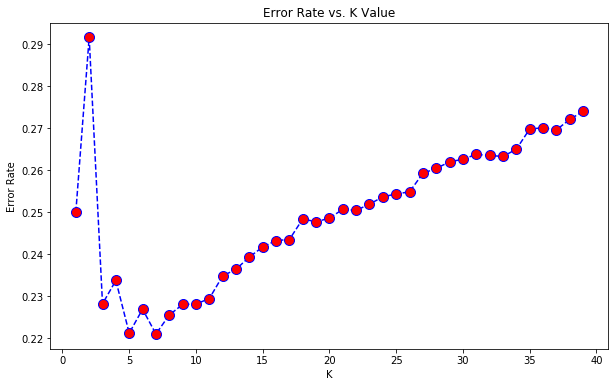

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 1  1  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  2 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  2  1  0]
 [ 0  0  0 ...  0  0  0]]


              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.70      1.00      0.82         7
           3       0.86      0.84      0.85        43
           4       0.88      0.84      0.86        88
           5       0.88      0.91      0.89       132
           6       0.91      0.91      0.91       200
           7       0.89      0.85      0.87       253
           8       0.80      0.85      0.82       304
           9       0.87      0.89      0.88       366
          10       0.90      0.89      0.90       384
          11       0.89      0.87      0.88       453
          12       0.84      0.87      0.85       456
          13       0.85      0.84      0.84       533
          14       0.86      0.78      0.82       482
          15       0

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 0  0  1 ...  0  0  0]
 [ 0  4  1 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.57      0.73         7
           3       0.87      0.60      0.71        43
           4       0.77      0.58      0.66        88
           5       0.68      0.83      0.75       132
           6       0.79      0.80      0.79       200
           7       0.84      0.76      0.80       253
           8       0.83      0.86      0.84       304
           9       0.83      0.84      0.84       366
          10       0.83      0.84      0.84       384
          11       0.86      0.84      0.85       453
          12       0.83      0.76      0.79       456
          13       0.78      0.81      0.79       533
          14       0.74      0.70      0.72       482
          15       

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN 2

In [78]:
A=pd.DataFrame(dataset.iloc[:,[9,5]])

b=pd.DataFrame(dataset.iloc[:,14])


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(A.iloc[:,])
A.iloc[:,] = imputer.transform(A.iloc[:,])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(b.iloc[:,])
b.iloc[:,] = imputer.transform(b.iloc[:,])


from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test=train_test_split(A,b,test_size=0.3)


In [79]:
knn.fit(A_train,b_train)
pred = knn.predict(A_test)
print(confusion_matrix(b_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[[  34   50  112    0    3   11   32  710   16    3    0    1    1    0
    46    9   77]
 [  35   75  235    0    1   19   56  963   41    8    0    2    0    0
    40    7  134]
 [  42  103  262    0    2   13   40 1377   39    9    0    4    0    0
    64   18  139]
 [  15   35   57    1    2    5   33  474    5    3    0    4    0    0
    30    8   75]
 [   7   15   36    1    2   11   35  321   11    0    0    4    0    0
    33    6   70]
 [  11   15   37    1    2   28  134  314    4    0    0    4    0    0
    72   14  128]
 [  10   32   73    1    9   44  388  973    8    6    0    5    1    0
   191   35  340]
 [  56  157  410    2    6   60  256 8386   59   19    0   18    0    0
   172   50  513]
 [  15   64  141    0    0   11   31  655   24    6    0    0    3    0
    24   12   90]
 [  12   31   74    1    0    9   18  379   15    9    0    2    0    0
    18    4   55]
 [   4   11   43    1    0    2   21  353    8    1    0    2    1    0
    12   10   57]
 [  11   2

In [80]:
print(classification_report(b_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         ENE       0.10      0.03      0.05      1105
         ESE       0.09      0.05      0.06      1616
        East       0.14      0.12      0.13      2112
          NE       0.08      0.00      0.00       747
         NNE       0.05      0.00      0.01       552
         NNW       0.09      0.04      0.05       764
          NW       0.21      0.18      0.20      2116
       North       0.42      0.83      0.55     10164
          SE       0.08      0.02      0.03      1076
         SSE       0.12      0.01      0.03       627
         SSW       0.00      0.00      0.00       526
          SW       0.06      0.00      0.01       952
       South       0.00      0.00      0.00       445
    Variable       0.00      0.00      0.00         3
         WNW       0.15      0.09      0.11      2239
         WSW       0.09      0.02      0.03      1620
        West       0.19      0.15      0.16      3633

    accuracy              

# KNN 3

In [81]:
knn.fit(h_train,i_train)
pred = knn.predict(h_test)
print(confusion_matrix(i_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[[18307   467]
 [  856   568]]


In [82]:
print(classification_report(i_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18774
           1       0.55      0.40      0.46      1424

    accuracy                           0.93     20198
   macro avg       0.75      0.69      0.71     20198
weighted avg       0.93      0.93      0.93     20198



In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [84]:
import warnings
warnings.filterwarnings('ignore')

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(h_train,i_train)
    pred_i = knn.predict(h_test)
    error_rate.append(np.mean(pred_i != i_test))


Text(0, 0.5, 'Error Rate')

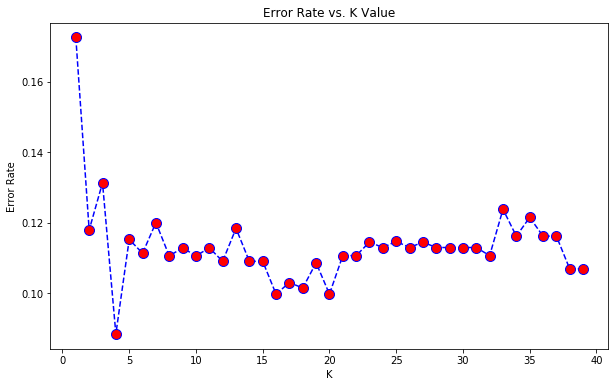

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(h_train,i_train)
pred = knn.predict(h_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(i_test,pred))
print('\n')
print(classification_report(i_test,pred))


WITH K=1


[[17216  1558]
 [  581   843]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.94     18774
           1       0.35      0.59      0.44      1424

    accuracy                           0.89     20198
   macro avg       0.66      0.75      0.69     20198
weighted avg       0.92      0.89      0.91     20198



In [87]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(h_train,i_train)
pred = knn.predict(h_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(i_test,pred))
print('\n')
print(classification_report(i_test,pred))


WITH K=1


[[18307   467]
 [  856   568]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18774
           1       0.55      0.40      0.46      1424

    accuracy                           0.93     20198
   macro avg       0.75      0.69      0.71     20198
weighted avg       0.93      0.93      0.93     20198



In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(i_test, pred)
print("Accuracy: ",acc)
clf_arr.append(accuracy_score(i_test, pred))

Accuracy:  0.9344984651945737


We can see that out of 3 models last model has greatest accuracy of approx 93.5%

# Logistic regression 

After training our model we moved to logistic regression.The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

Now we are going to import Logistic regression from scikitlearn to begin with our model training.

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(h_train, i_train)


i_pred_test = classifier.predict(h_test)

from sklearn.metrics import classification_report
print(classification_report(i_test, i_pred_test))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18774
           1       0.59      0.30      0.40      1424

    accuracy                           0.94     20198
   macro avg       0.77      0.64      0.68     20198
weighted avg       0.92      0.94      0.93     20198



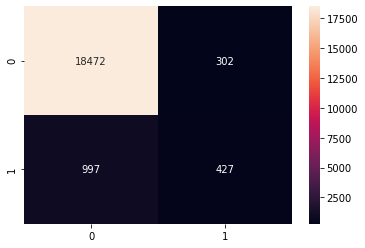

In [90]:
cm = confusion_matrix(i_test, i_pred_test)
sns.heatmap(cm , annot = True ,fmt = "d")

In [91]:
accuracy= (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: ",accuracy)
clf_arr.append(accuracy)

Accuracy:  0.9356867016536291


Our logistic regression model also give accuracy = 93.56%

In [92]:
i_predict_train = classifier.predict(h_train)
i_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

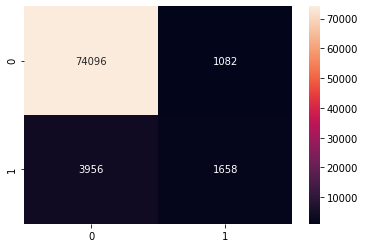

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(i_train, i_predict_train)
sns.heatmap(cm , annot = True, fmt = "d")

In [94]:
accuracy= (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: ",accuracy)

Accuracy:  0.9376423408258243


In [95]:
from sklearn.metrics import classification_report
print(classification_report(i_train, i_predict_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     75178
           1       0.61      0.30      0.40      5614

    accuracy                           0.94     80792
   macro avg       0.78      0.64      0.68     80792
weighted avg       0.93      0.94      0.93     80792



# SVM

In [96]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf', C=1,gamma="auto")
svm_model.fit(h_train,i_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
svm_model_pred=svm_model.predict(h_test)

In [98]:
cm=confusion_matrix(i_test,svm_model_pred)
cm

array([[18472,   302],
       [  997,   427]], dtype=int64)

In [99]:
report=classification_report(i_test,svm_model_pred)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18774
           1       0.59      0.30      0.40      1424

    accuracy                           0.94     20198
   macro avg       0.77      0.64      0.68     20198
weighted avg       0.92      0.94      0.93     20198



In [100]:
acc=accuracy_score(i_test,svm_model_pred)
print("Accuracy: ",acc)
clf_arr.append(accuracy_score(i_test,svm_model_pred))

Accuracy:  0.9356867016536291


SVM gives almost the same result as logistic regression. We get only 93% accuracy. But we are going to fine tune this model as it is one of the best model for predictions.

# Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(h_train,i_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
rfc_pred=rfc.predict(h_test)
rfc_cm=confusion_matrix(i_test,rfc_pred)
print(rfc_cm)

[[18401   373]
 [  900   524]]


In [103]:
acc = accuracy_score(i_test, rfc_pred)
print("Accuracy: ",acc)
clf_arr.append( accuracy_score(i_test, rfc_pred))

Accuracy:  0.9369739578176057


Random forest classifier is the good choice to use. It is giving almost same accuracy as decision tree. It is an esemble method and it forms decision tree during its calculations. Hence we will fine tune this model insted of decision tree.

In [104]:
print(classification_report(i_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18774
           1       0.58      0.37      0.45      1424

    accuracy                           0.94     20198
   macro avg       0.77      0.67      0.71     20198
weighted avg       0.93      0.94      0.93     20198



In [105]:

clf_List=['Decision Tree','KNN','Logistic Regression','SVM','Random Forest']
normal_clf=pd.DataFrame(clf_arr,index=clf_List)
normal_clf.sort_values(by=0,ascending=False)


,0
Decision Tree,0.936974
Random Forest,0.936974
Logistic Regression,0.935687
SVM,0.935687
KNN,0.934498


From the table we can see that all classification models have almost equal accuracy i.e. 93.5%

# HYPERPARAMETERS AND FINE TUNING

After performing and seeing the results of our models, its time to fine tune them to give even more accurate result.

# GRID SEARCHCV

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

# SVM USING GRID SEARCHCV

In [119]:
from sklearn.model_selection import GridSearchCV

In [159]:
svm_clf=GridSearchCV(estimator=svm.SVC(gamma="auto",probability=True),param_grid={
    'C':[1,5,10],
    'kernel':['rbf']
},cv=5,return_train_score=False)
svm_clf.fit(h_train,i_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [160]:
svm_clf_df=pd.DataFrame(svm_clf.cv_results_)

In [161]:
svm_clf_df[['param_C','param_kernel','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_C,param_kernel,mean_test_score
0,1,rbf,0.937642
1,5,rbf,0.937642
2,10,rbf,0.937642


In [184]:
svm_clf_pred=svm_clf.predict(h_test)
acc = accuracy_score(i_test, svm_clf_pred)
print("Accuracy: ",acc)
grid_arr=array.array('f',)

grid_arr.append(acc)


Accuracy:  0.9356867016536291


# KNN USING GRID SEARCHCV

In [144]:
knn_clf=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={
    "n_neighbors":[5,11],
    "metric":['euclidean','manhattan'],'weights':['uniform','distance']
},cv=5,return_train_score=False)

In [145]:
knn_clf.fit(A_train,b_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [146]:
knn_clf_df=pd.DataFrame(knn_clf.cv_results_)

In [147]:
knn_clf_df[['param_n_neighbors','param_metric','param_weights','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_neighbors,param_metric,param_weights,mean_test_score
2,11,euclidean,uniform,0.310540
6,11,manhattan,uniform,0.310299
3,11,euclidean,distance,0.306890
7,11,manhattan,distance,0.306848
4,5,manhattan,uniform,0.270366
0,5,euclidean,uniform,0.270324
1,5,euclidean,distance,0.269107
5,5,manhattan,distance,0.269079


In [185]:
knn_clf_pred=knn_clf.predict(A_test)
acc = accuracy_score(b_test, knn_clf_pred)
print("Accuracy: ",acc)

grid_arr.append(accuracy_score(b_test, knn_clf_pred))


Accuracy:  0.3085454005347064


# RANDOM FOREST USING GRID SEARCHCV

In [121]:
rf_clf= GridSearchCV(estimator=RandomForestClassifier(),param_grid={
   "n_estimators" :[200,700],
    "max_features" : ['auto','sqrt','log2']
},cv=5,return_train_score=False)

In [122]:
rf_clf.fit(h_train,i_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [124]:
rf_clf_df=pd.DataFrame(rf_clf.cv_results_)

In [125]:
rf_clf_df[['param_n_estimators','param_max_features','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_estimators,param_max_features,mean_test_score
1,700,auto,0.937989
0,200,auto,0.937927
2,200,sqrt,0.937927
3,700,sqrt,0.937927
4,200,log2,0.937927
5,700,log2,0.937927


In [126]:
rf_clf_pred=rf_clf.predict(h_test)

In [186]:
acc = accuracy_score(i_test, rf_clf_pred)
print("Accuracy: ",acc)

grid_arr.append(acc)


Accuracy:  0.9369739578176057


In [187]:
grid_List=['SVM','KNN','Random Forest']
grid_df=pd.DataFrame(grid_arr,index=grid_List)
grid_df.sort_values(by=0,ascending=False)


,0
Random Forest,0.936974
SVM,0.935687
KNN,0.308545


# Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.It is of two types hard voting and soft voting

In [129]:
from sklearn.ensemble import VotingClassifier

# SVM

# Hard Voting

In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [165]:
svm_voting_clf_hard= VotingClassifier(estimators=[('svm',svm_clf)],voting='hard')

In [166]:
svm_voting_clf_hard.fit(h_train,i_train)

VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3, gamma='auto',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
            

In [167]:
svm_voting_clf_hard_pred=svm_voting_clf_hard.predict(h_test)

In [168]:
cm=confusion_matrix(i_test,svm_voting_clf_hard_pred)
cm

array([[18472,   302],
       [  997,   427]], dtype=int64)

In [188]:
acc = accuracy_score(i_test, svm_voting_clf_hard_pred)
print("Accuracy: ",acc)

voting_arr=array.array('f',)
voting_arr.append(accuracy_score(i_test, svm_voting_clf_hard_pred))


Accuracy:  0.9356867016536291


In [170]:
print(classification_report(i_test, svm_voting_clf_hard_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18774
           1       0.59      0.30      0.40      1424

    accuracy                           0.94     20198
   macro avg       0.77      0.64      0.68     20198
weighted avg       0.92      0.94      0.93     20198



# SOFT VOTING¶

In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [171]:
svm_voting_clf_soft= VotingClassifier(estimators=[('svm',svm_clf)],voting='soft')

In [172]:
svm_voting_clf_soft.fit(h_train,i_train)

VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3, gamma='auto',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
            

In [173]:
svm_voting_clf_soft_pred=svm_voting_clf_soft.predict(h_test)

In [174]:
cm=confusion_matrix(i_test,svm_voting_clf_soft_pred)
cm


array([[18774,     0],
       [ 1424,     0]], dtype=int64)

In [189]:
acc = accuracy_score(i_test, svm_voting_clf_soft_pred)
print("Accuracy: ",acc)

voting_arr.append(acc)


Accuracy:  0.9294979700960491


In [176]:
print(classification_report(i_test, svm_voting_clf_soft_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18774
           1       0.00      0.00      0.00      1424

    accuracy                           0.93     20198
   macro avg       0.46      0.50      0.48     20198
weighted avg       0.86      0.93      0.90     20198



# KNN

# HARD VOTING

In [149]:
knn_voting_clf_hard= VotingClassifier(estimators=[('knn',knn_clf)],voting='hard')
knn_voting_clf_hard.fit(h_train,i_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform'),
                                           iid='warn', n_jobs=None,
                                           param_grid

In [150]:
knn_voting_clf_hard_pred=knn_voting_clf_hard.predict(h_test)
cm=confusion_matrix(i_test,knn_voting_clf_hard_pred)
cm

array([[18297,   477],
       [  904,   520]], dtype=int64)

In [190]:
acc = accuracy_score(i_test, knn_voting_clf_hard_pred)
print("Accuracy: ",acc)

voting_arr.append(acc)


Accuracy:  0.9316268937518566


In [152]:
print(classification_report(i_test, knn_voting_clf_hard_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18774
           1       0.52      0.37      0.43      1424

    accuracy                           0.93     20198
   macro avg       0.74      0.67      0.70     20198
weighted avg       0.92      0.93      0.93     20198



# SOFT VOTING

In [153]:
knn_voting_clf_soft= VotingClassifier(estimators=[('knn',knn_clf)],voting='soft')
knn_voting_clf_soft.fit(h_train,i_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform'),
                                           iid='warn', n_jobs=None,
                                           param_grid

In [156]:
knn_voting_clf_soft_pred=knn_voting_clf_soft.predict(h_test)
cm=confusion_matrix(i_test,knn_voting_clf_soft_pred)
cm

array([[18297,   477],
       [  904,   520]], dtype=int64)

In [191]:
acc = accuracy_score(i_test, knn_voting_clf_soft_pred)
print("Accuracy: ",acc)

voting_arr.append(acc)


Accuracy:  0.9316268937518566


In [158]:
print(classification_report(i_test, knn_voting_clf_soft_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18774
           1       0.52      0.37      0.43      1424

    accuracy                           0.93     20198
   macro avg       0.74      0.67      0.70     20198
weighted avg       0.92      0.93      0.93     20198



# Random Forest

# Hard Voting

In [134]:
rf_voting_clf_hard=VotingClassifier(estimators=[('rf',rf_clf)],voting='hard')
rf_voting_clf_hard.fit(h_train,i_train)

VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=RandomForestClassifier(bootstrap=True,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                    

In [136]:
rf_voting_clf_hard_pred=rf_voting_clf_hard.predict(h_test)
cm=confusion_matrix(i_test,rf_voting_clf_hard_pred)
cm

array([[18401,   373],
       [  900,   524]], dtype=int64)

In [192]:
acc=accuracy_score(i_test,rf_voting_clf_hard_pred)
print("Accuracy: ",acc)

voting_arr.append(acc)


Accuracy:  0.9369739578176057


# Soft Voting

In [139]:
rf_voting_clf_soft=VotingClassifier(estimators=[('rf',rf_clf)],voting='soft')
rf_voting_clf_soft.fit(h_train,i_train)

VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=RandomForestClassifier(bootstrap=True,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                    

In [141]:
rf_voting_clf_soft_pred=rf_voting_clf_soft.predict(h_test)
cm=confusion_matrix(i_test,rf_voting_clf_soft_pred)
cm

array([[18401,   373],
       [  900,   524]], dtype=int64)

In [193]:
acc=accuracy_score(i_test,rf_voting_clf_soft_pred)
print("Accuracy: ",acc)

voting_arr.append(acc)


Accuracy:  0.9369739578176057


# VOTING RESULT

In [194]:
Voting_list=['SVM HARD','SVM SOFT','KNN HARD','KNN SOFT','RF HARD','RF SOFT']
voting_df=pd.DataFrame(voting_arr,index=Voting_list)
voting_df.sort_values(by=0, ascending=False)

,0
RF HARD,0.936974
RF SOFT,0.936974
SVM HARD,0.935687
KNN HARD,0.931627
KNN SOFT,0.931627
SVM SOFT,0.929498


# Conclusion

We can conclude that polynomial regression is best suited for our regression model based on this dataset.Cross validation also does not effect the results. Rather than increase in accuracy, it get decreased by large percents.

In case of our classifier models, Decision tree, logistic regression,random forest, svm and KNN performs very well. All these models have accuracy greater than 90%. . Cross Validation, Grid SearchCV and voting classifier does not affect the output of Random forest and KNN that much but in case of SVM We can conclude that we can use Decision tree, Random Forest or KNN for our future classification needs.